In [0]:
%matplotlib inline
#!/usr/bin/python
#from __future__ import unicode_literals

In [4]:
from google.colab import files
files.upload()
1==1

Saving my_utils.py to my_utils (1).py
Saving TREC.test to TREC.test
Saving TREC.train to TREC.train


True

In [0]:

import numpy as np
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
from copy import deepcopy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from gensim.summarization import bm25
import nltk
import numpy as np
import random
import pickle
import scipy
import sklearn
import tqdm
import seaborn as sns

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    return np.exp(x) / np.sum(np.exp(x), axis=0)
  
import math

def sigmoid(x):
  return 1 / (1 + math.exp(-x))


In [6]:
from my_utils import plot_learning_curve,plot_model,plot_model_graph

Using TensorFlow backend.


In [0]:
from __future__ import unicode_literals
import xml.etree.ElementTree as ET
import copy
from pprint import pprint
import numpy as np
import pandas as pd
import numpy as np
import re

import networkx as nx
import matplotlib.pyplot as plt
#from wxconv import WXC

import sys

In [0]:
import os
import re
import sys
import numpy as np
import pandas as pd
import sklearn
from collections import Counter
from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.metrics import accuracy_score,f1_score
import gensim
from gensim.models import KeyedVectors
import nltk
#from nltk.corpus import stopwords
#stopword = stopwords.words('english')
import tensorflow as tf
import keras
from keras.models import Model,Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense,Activation,Bidirectional,TimeDistributed,Activation
from keras.optimizers import Adam,RMSprop
from keras import metrics
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Embedding,Input,Concatenate,Conv2D,Conv1D,MaxPooling1D,Multiply,Add,Dot
from keras.layers import AlphaDropout,Reshape,Dropout,LSTM,Bidirectional,Lambda,CuDNNLSTM
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras import backend as K
from keras.engine.topology import Layer
from keras import initializers, regularizers, constraints
from keras.utils import to_categorical

In [0]:
train=open("TREC.train",encoding= "ISO-8859-1").readlines()
trainlabels=[re.split(r":\S+",i)[0] for i in train]
train=[re.split(r":\S+",i)[1].strip() for i in train]

test=open("TREC.test",encoding= "ISO-8859-1").readlines()
testlabels=[re.split(r":\S+",i)[0] for i in test]
test=[re.split(r":\S+",i)[1].strip() for i in test]

labeltoind={}
for i,j in enumerate(list(set(trainlabels))):
    labeltoind[j]=i
trainlabels=[labeltoind[j] for j in trainlabels]
testlabels=[labeltoind[j] for j in testlabels]



In [10]:
#PATH="/media/anvesh/Garden of EDEN/Academics/embedding_models/eng/"


#from gensim.models import KeyedVectors
#embedding_model=KeyedVectors.load_word2vec_format(PATH + "wiki-news-300d-1M.vec")
#embeddings_index=embedding_model

!wget https://nlp.stanford.edu/data/glove.840B.300d.zip
from zipfile import ZipFile
with ZipFile('glove.840B.300d.zip','r') as f:
  f.extractall()
  
!rm -rf glove.840B.300d.zip

embedding_index = {}
with open('glove.840B.300d.txt','r',encoding='utf-8') as f1:
  for line in f1.readlines():
    words = line.split(' ')
    word = words[0]
    embedding_vec = np.asarray(words[1:],dtype='float32')
    embedding_index[word] = embedding_vec
    
embedding_model=embedding_index

--2019-05-01 16:37:11--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2176768927 (2.0G) [application/zip]
Saving to: ‘glove.840B.300d.zip’

glove.840B.300d.zip 100%[===================>]   2.03G   905KB/s    in 16m 10s 

2019-05-01 16:53:22 (2.14 MB/s) - ‘glove.840B.300d.zip’ saved [2176768927/2176768927]



In [0]:
embeddings_index=embedding_index

In [0]:
maxlen = 20
maxwords = 30000
embed_dim = 300

tok = Tokenizer(num_words=maxwords)
tok.fit_on_texts(train)
word_index = tok.word_index

embedding_matrix = np.zeros((len(word_index) + 1, embed_dim))
for word, i in word_index.items():
    if word in embeddings_index:
        embedding_vector = embeddings_index[word]
    embedding_matrix[i] = embedding_vector


In [13]:
print(len(word_index))

8461


In [0]:
train_seq = tok.texts_to_sequences(train)
trainind = pad_sequences(train_seq,maxlen=maxlen)

test_seq = tok.texts_to_sequences(test)
testind = pad_sequences(test_seq,maxlen=maxlen)

In [0]:
train_to_categorical=to_categorical(trainlabels)
test_to_categorical=to_categorical(testlabels)

In [0]:
#from my_utils import *

In [17]:
def Attention2layer(units,lo):
  edense1=TimeDistributed(Dense(units,activation="tanh",bias=True),name="dense1")(lo)
  edense2=TimeDistributed(Dense(1,activation="linear",bias=True),name="dense2")(edense1)
  #temp=Reshape((20))(edense2)
  temp=Flatten()(edense2)
  print(temp.shape)
  alp=Activation("softmax")(temp)
  dot=Dot(axes=1)([alp,lo])
  return dot

c=test_to_categorical.shape[1]
I=Input(shape=(maxlen,))
si=Embedding(len(word_index)+1,embed_dim,weights=[embedding_matrix],trainable=False)(I)
lo=Bidirectional(LSTM(30,return_sequences=True))(si)


units=10
ao=Attention2layer(10,lo)
do=Dense(100,activation="relu")(ao)
o=Dense(c,activation="softmax")(do)
model=Model(inputs=I,outputs=o)
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
(?, ?)
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 20)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 20, 300)      2538600     input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 20, 60)       79440       embedding_1[0][0]                
__________________________________________________________________________________________________
dense1 (TimeDistributed)        (None, 20, 10)       610         bidirectional_1[0][0]            
______________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(10, activation="tanh", use_bias=True)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="linear", use_bias=True)`
  This is separate from the ipykernel package so we can avoid doing imports until


In [0]:
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from IPython.display import SVG

#plot_model(model, to_file='model.png')
#SVG(model_to_dot(model).create(prog='dot', format='svg'))


In [19]:
model.compile(loss='categorical_crossentropy',optimizer="adam",metrics=['accuracy'])
modelcheckpoint = ModelCheckpoint('temp.h5' ,monitor='val_loss', verbose=0, save_best_only=True,mode='min',save_weights_only=True)
earlystop = EarlyStopping(monitor='val_loss', min_delta=0, patience=10)
history=model.fit(trainind,train_to_categorical,batch_size=30,validation_split=0.2,callbacks=[modelcheckpoint,earlystop],epochs=20)

Instructions for updating:
Use tf.cast instead.
Train on 4361 samples, validate on 1091 samples
Epoch 1/20
4361/4361 [==============================] - 9s 2ms/step - loss: 1.1289 - acc: 0.5728 - val_loss: 0.6782 - val_acc: 0.7534
Epoch 2/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.5047 - acc: 0.8179 - val_loss: 0.4492 - val_acc: 0.8396
Epoch 3/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.3493 - acc: 0.8778 - val_loss: 0.4660 - val_acc: 0.8332
Epoch 4/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.2550 - acc: 0.9113 - val_loss: 0.4145 - val_acc: 0.8478
Epoch 5/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.1778 - acc: 0.9450 - val_loss: 0.4387 - val_acc: 0.8552
Epoch 6/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.1198 - acc: 0.9619 - val_loss: 0.4653 - val_acc: 0.8598
Epoch 7/20
4361/4361 [==============================] - 6s 1ms/step - loss: 0.0804 - acc: 0.9745 - v

500/500 [==============================] - 0s 554us/step
[0.5248865756988526, 0.8899999990463257]
Overfiting after 3 epochs.


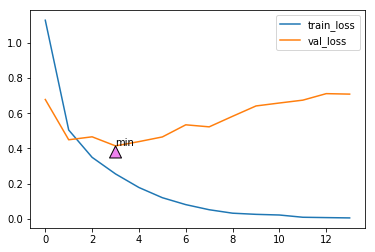

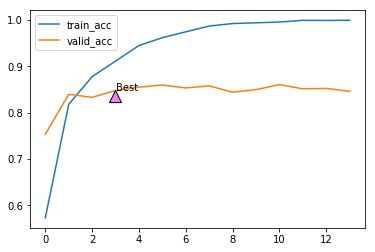

In [20]:
print(model.evaluate(testind,test_to_categorical))
plot_learning_curve(history)

Sanity check


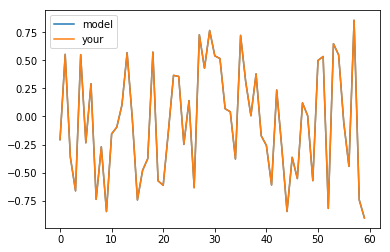

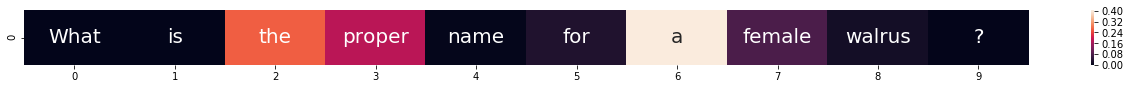

output 1


['a', 'the', 'proper', 'female', 'for', 'walrus', 'name', '?', 'is', 'What']

In [38]:

def displayatten(sent,model=model,I=I,lo=lo,ao=ao,tok=tok,plot_sanity=False,plot_attention=True,annotate=True):
    """
    provide sent: sentence
    i : Input tensor (seq)
    lo : lstm layer output tensor
    ao : attention layer output tensor
    tok : Tokenizer(num_words=maxwords)
    model : Complete Model, make sure Attention layer has name 'AttentionLayer' 
    Returns words of sentence in order of Importance, highest to lowest
    """
    seq=tok.texts_to_sequences([sent])
    pseq=pad_sequences(seq,maxlen)
    tempmodel=Model(inputs=I,outputs=[lo,ao])
    lout,aout=tempmodel.predict([pseq])
    w1=model.get_layer('dense1').get_weights()[0]#(lstm, attenunits)
    b1=model.get_layer('dense1').get_weights()[1]#(attenunits,)
    w2=model.get_layer('dense2').get_weights()[0]#(attenunits, 1)
    b2=model.get_layer('dense2').get_weights()[1]#(1,)
    o=np.tanh(lout @ w1 + b1)@w2 + b2
    alphas=softmax(o.flatten())
    wsum=np.average(lout.reshape(lout.shape[1:]),weights=alphas,axis=0)
    temp=aout[0]/wsum
    if plot_sanity==True:
        print("Sanity check")
        plt.plot(aout[0],label="model")
        plt.plot(wsum,label="your")
        plt.legend()
        plt.show()
    l=len(sent.split())
    a=alphas[-l:]
    s=np.array(sent.split())
    if plot_attention==True:
        if annotate==False:
          sns.heatmap(alphas.reshape(len(alphas),1))
          plt.show()
        else:
          plt.figure(figsize=(len(sent)/2,1))
          sns.heatmap(a.reshape(1,len(a)),annot=s.reshape(1,s.shape[0]),fmt="",annot_kws={"size": 20})
          plt.show()
    print("output",np.argmax(model.predict([pseq])))#change if not multilabel
    return [x for _,x in sorted(zip(a,s),reverse=True)]
sent=  'What is the proper name for a female walrus ?'
displayatten(sent,model=model,I=I,lo=lo,ao=ao,tok=tok,plot_sanity=True,plot_attention=True,annotate=True)

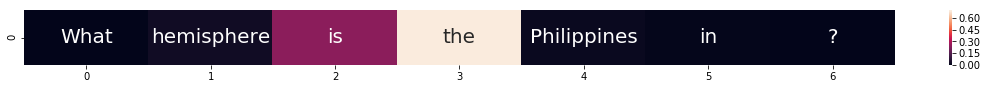

output 3


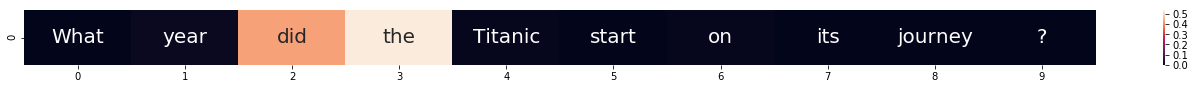

output 2


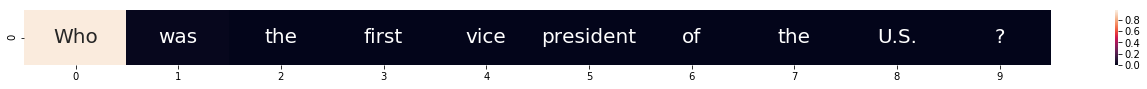

output 0


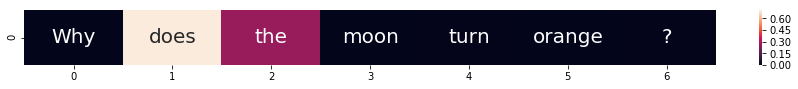

output 5


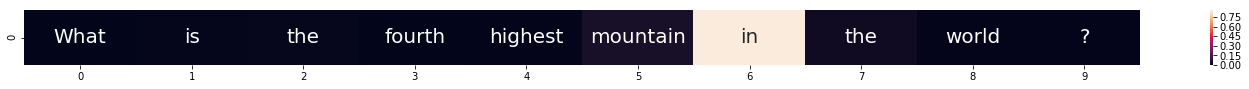

output 3


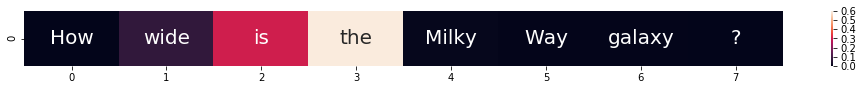

output 2


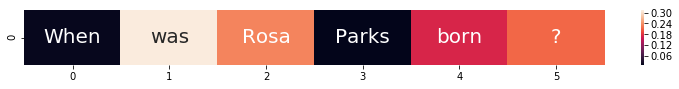

output 2


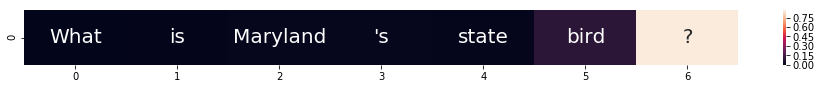

output 1


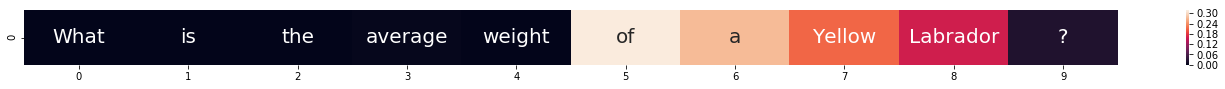

output 2


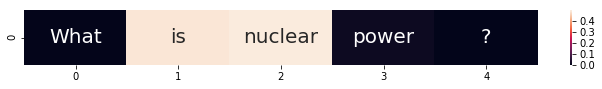

output 5


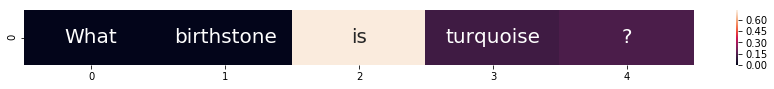

output 5


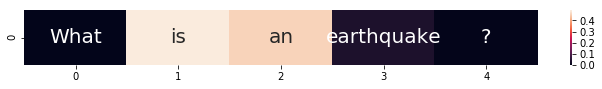

output 5


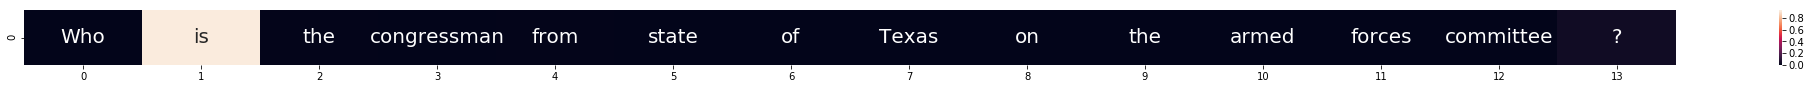

output 0


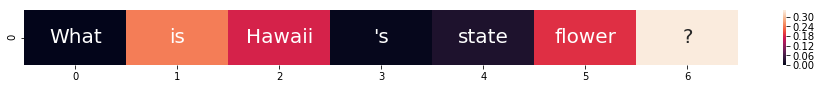

output 3


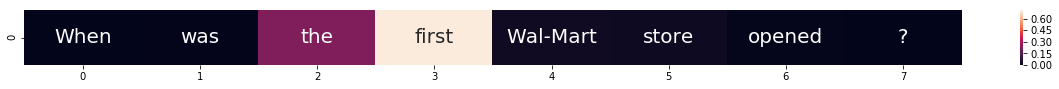

output 2


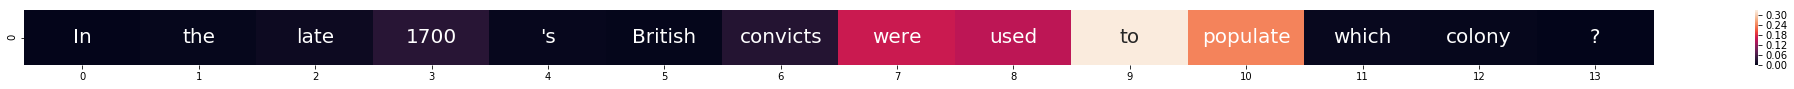

output 2


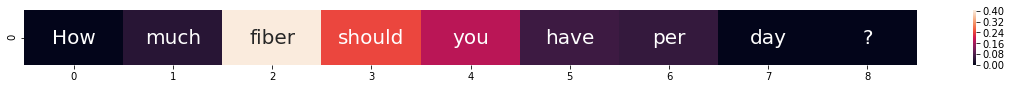

output 2


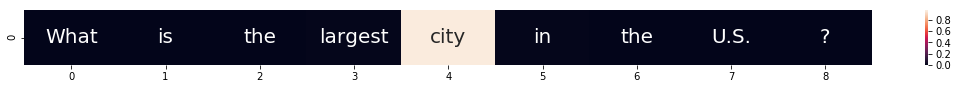

output 3


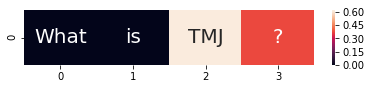

output 5


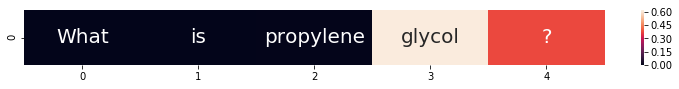

output 5


In [39]:
for i in random.sample(test,20):
    displayatten(i)

In [0]:
labeltoind

{'ABBR': 5, 'DESC': 4, 'ENTY': 0, 'HUM': 1, 'LOC': 2, 'NUM': 3}

In [40]:
random.sample(test,100)

['How tall is the Gateway Arch in St. Louis , MO ?',
 'Who is the Prime Minister of Canada ?',
 'What does your spleen do ?',
 "Who wrote `` The Divine Comedy '' ?",
 'What is leukemia ?',
 'What is amitriptyline ?',
 'What is the Moulin Rouge ?',
 'When was Lyndon B. Johnson born ?',
 'What are spider veins ?',
 'What planet has the strongest magnetic field of all the planets ?',
 'What is the longest suspension bridge in the U.S. ?',
 'What is compounded interest ?',
 'What is acid rain ?',
 'What monastery was raided by Vikings in the late eighth century ?',
 'When is the summer solstice ?',
 'What are the two houses of the Legislative branch ?',
 'What is caffeine ?',
 'What are pathogens ?',
 'Where is the Mason/Dixon line ?',
 'What is the diameter of a golf ball ?',
 'What is the state flower of Michigan ?',
 'Who discovered America ?',
 'What is bio-diversity ?',
 "What is Hawaii 's state flower ?",
 'What is an earthquake ?',
 "What American composer wrote the music for `` Wes